<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_Practice_K-NeighborsClassification/blob/main/DataScience_Practice_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbord (K-NN)**


---



# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Dataset**

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.shape

(400, 3)

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# **Splitting Training & Testing Data**

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [12]:
print(X_train)

[[    29  28000]
 [    45  22000]
 [    46 117000]
 [    32  18000]
 [    22  81000]
 [    25  87000]
 [    48  33000]
 [    35  58000]
 [    47  23000]
 [    26  32000]
 [    32 135000]
 [    60  34000]
 [    52  21000]
 [    38  55000]
 [    25  90000]
 [    58  38000]
 [    49  88000]
 [    37  78000]
 [    35  77000]
 [    34  43000]
 [    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  5100

In [13]:
print(X_test)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [14]:
print(y_train)

[0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]


In [15]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]


# **Feature Scaling**

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.80330081 -1.19121795]
 [ 0.75697997 -1.36859801]
 [ 0.85449752  1.43991958]
 [-0.51074816 -1.48685138]
 [-1.48592365  0.37563923]
 [-1.19337101  0.55301929]
 [ 1.04953262 -1.04340124]
 [-0.21819552 -0.30431766]
 [ 0.95201507 -1.33903467]
 [-1.09585346 -1.07296458]
 [-0.51074816  1.97205975]
 [ 2.21974321 -1.0138379 ]
 [ 1.43960282 -1.39816136]
 [ 0.07435713 -0.39300769]
 [-1.19337101  0.64170932]
 [ 2.02470811 -0.89558452]
 [ 1.14705017  0.58258263]
 [-0.02316042  0.2869492 ]
 [-0.21819552  0.25738586]
 [-0.31571307 -0.74776781]
 [-1.68095875 -0.57038775]
 [ 0.85449752  0.58258263]
 [-0.60826571 -1.0138379 ]
 [ 0.95201507 -1.13209127]
 [-0.21819552 -0.54082441]
 [ 0.17187468  0.81908937]
 [-0.41323061  1.32166621]
 [ 1.14705017  0.52345594]
 [ 0.75697997  0.31651254]
 [ 0.65946243 -0.86602118]
 [ 0.36690978 -0.27475432]
 [ 0.46442733 -0.45213438]
 [-0.21819552  0.13913248]
 [ 0.36690978  0.10956914]
 [-0.99833591  0.81908937]
 [-0.70578326  1.41035623]
 [ 0.36690978 -0.48169772]
 

# **Training K-NN Model**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
cls.fit(X_train, y_train)

KNeighborsClassifier()

# **Predicting Result**

In [18]:
y_pred = cls.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# **Model Performance**

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
print(accuracy_score(y_pred, y_test))

[[40  8]
 [ 3 29]]
0.8625


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.78      0.91      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



# **Visulize Model Performance**

<ipython-input-20-d9ad2e207ec5>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


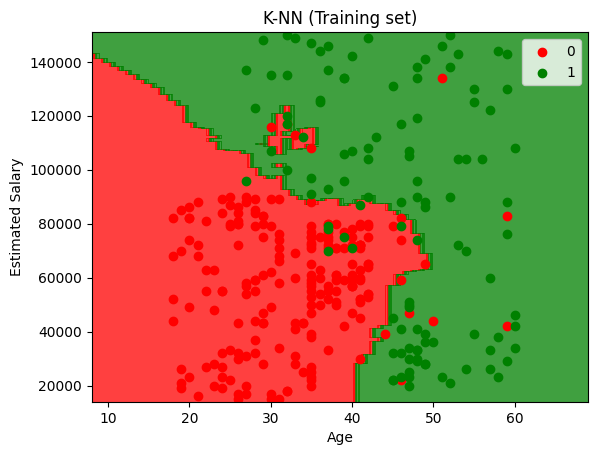

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, cls.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-21-c7d32a6f9b23>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


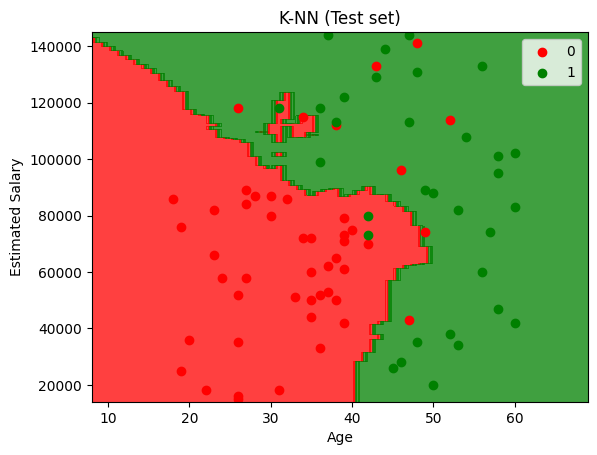

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, cls.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()